# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather Data
[Source: Original Research Paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)
#print(boston_dataset.feature_names)
#print("\n", boston_dataset.target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Explore data with Pandas Dataframes

In [6]:
# Create a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
# Add the price (target) column
data["PRICE"] = boston_dataset.target

In [7]:
data.head()
#data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [9]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts

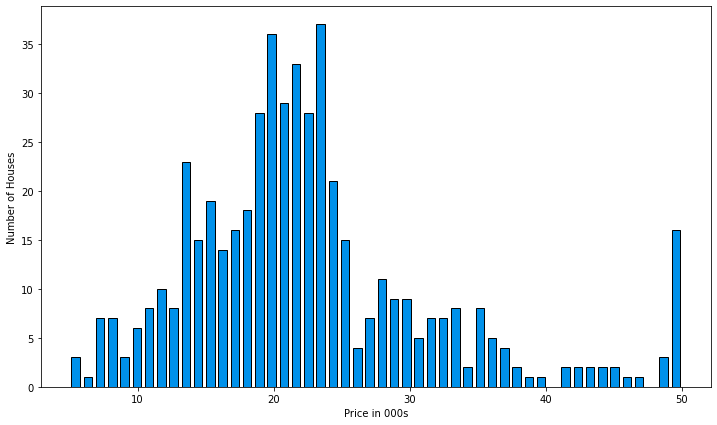

In [11]:
plt.figure(figsize = (12, 7))
plt.hist(data["PRICE"], bins = 50, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Price in 000s")
plt.ylabel("Number of Houses")
plt.show()

In [12]:
#plt.figure(figsize = (12, 7))
#plt.ylabel("Number of Houses")
#sns.distplot(data["PRICE"], bins = 50, hist = True, kde = True, color = "#ff6d00")
#plt.show()

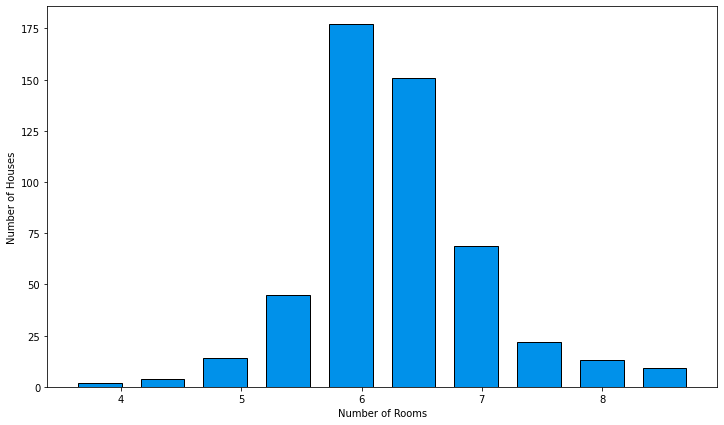

In [13]:
plt.figure(figsize = (12, 7))
plt.hist(data["RM"], bins = 10, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Number of Rooms")
plt.ylabel("Number of Houses")
plt.show()

In [14]:
#plt.figure(figsize = (12, 7))
#plt.ylabel("Number of Houses")
#sns.distplot(data["RM"], bins = 10, hist = True, kde = True, color = "#2e7d32")
#plt.show()

In [15]:
data["RM"].mean()

6.284634387351787

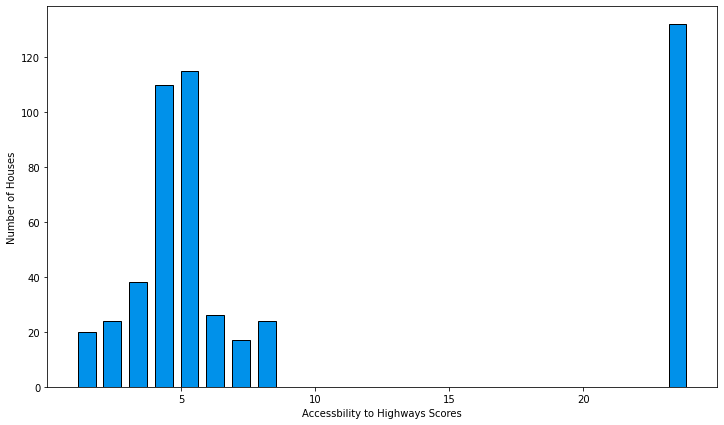

In [16]:
plt.figure(figsize = (12, 7))
plt.hist(data["RAD"], bins = 24, ec = "black", color = "#0091ea", rwidth = 0.7)
plt.xlabel("Accessbility to Highways Scores")
plt.ylabel("Number of Houses")
plt.show()

In [17]:
data["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

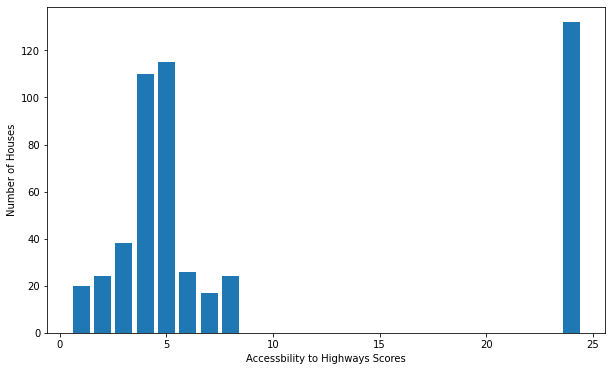

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


In [18]:
frequency = data["RAD"].value_counts()
type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize = (10, 6))
plt.xlabel("Accessbility to Highways Scores")
plt.ylabel("Number of Houses")
plt.bar(frequency.index, height = frequency)
plt.show()
print(frequency)

In [19]:
data["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [20]:
#print(data.min())
#print("\n", data.max())
#print("\n", data.mean())
#print("\n", data.median())

In [21]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X, Y)$$
## $$ -1.0 \leq \rho _{XY} \leq + 1.0$$

In [22]:
# Pearson Correlation Coefficient (Continuous data only)
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [23]:
# Filter the original correlation table
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

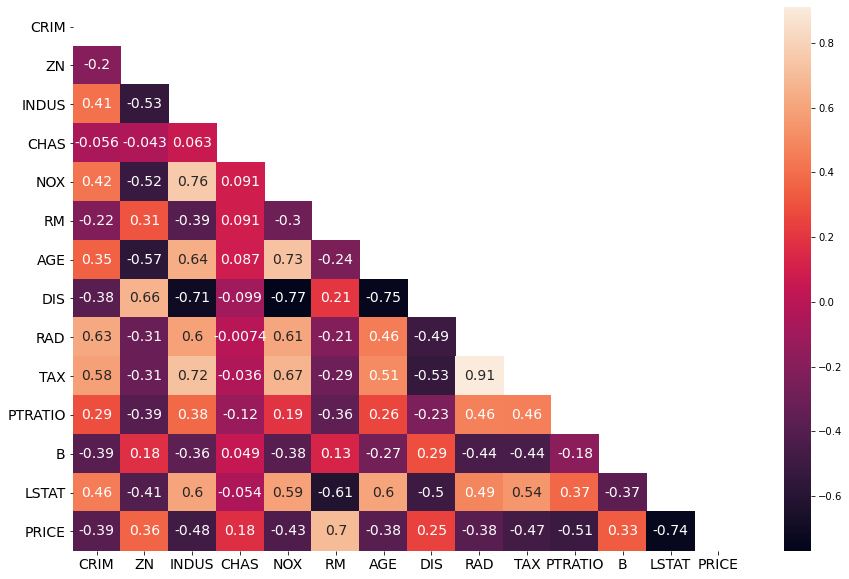

In [24]:
# Plot the correlation heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), mask = mask, annot = True, annot_kws = {"size": 14})
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

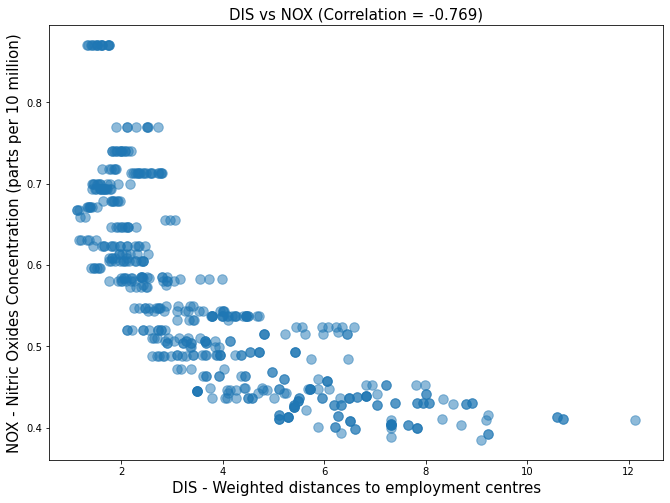

In [25]:
nox_dis_correlation = round(data["NOX"].corr(data["DIS"]), 3)
fig = plt.figure(figsize = [11, 8])
plt.scatter(data.DIS, data.NOX, s = 90, alpha = 0.5)
plt.ylabel("NOX - Nitric Oxides Concentration (parts per 10 million)", fontsize = 15)
plt.xlabel("DIS - Weighted distances to employment centres", fontsize = 15)
plt.title(f"DIS vs NOX (Correlation = {nox_dis_correlation})", fontsize = 15)
plt.show()

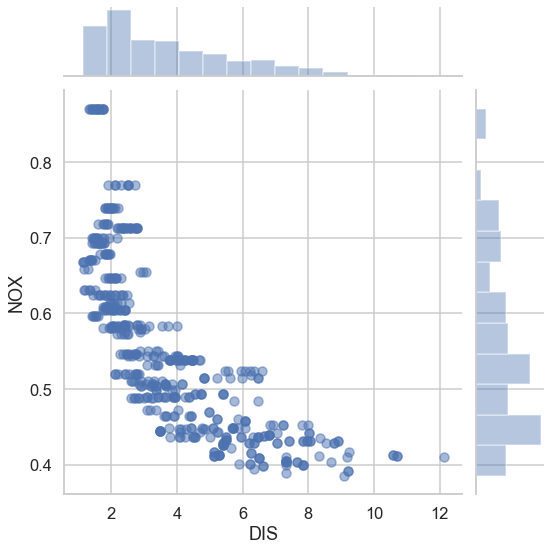

In [26]:
sns.set() # Reset the style to default.
sns.set_style("whitegrid")
sns.set_context("talk") # Make it larger.
sns.jointplot(x = data["DIS"], y = data["NOX"], height = 8, joint_kws = {"alpha": 0.5})
plt.show()

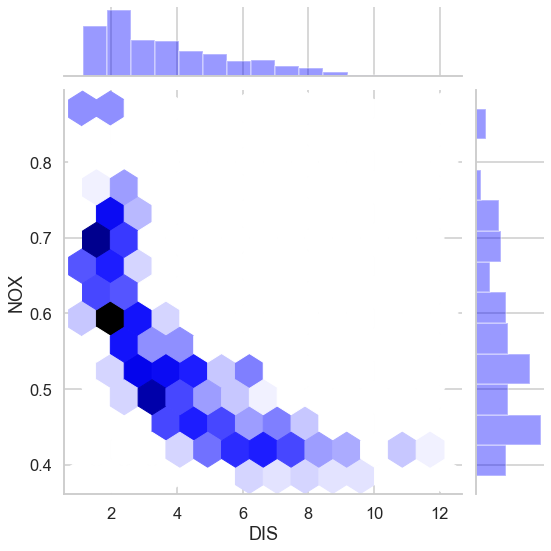

In [27]:
sns.set() # Reset the style to default.
sns.set_style("whitegrid")
sns.set_context("talk") # Make it larger.
sns.jointplot(kind = "hex", x = data["DIS"], y = data["NOX"], height = 8, color = "blue")
plt.show()

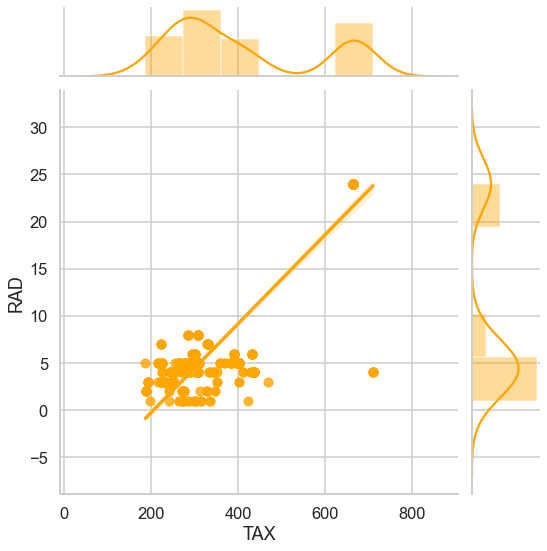

In [28]:
sns.set() # Reset the style to default.
sns.set_style("whitegrid")
sns.set_context("talk") # Make it larger.
sns.jointplot(kind = "reg", x = data["TAX"], y = data["RAD"], height = 8, color = "orange")
plt.show()
# Equivelant regression plot method using sns.
#sns.lmplot(x = "TAX", y = "RAD", data = data, height = 7)
#plt.show()

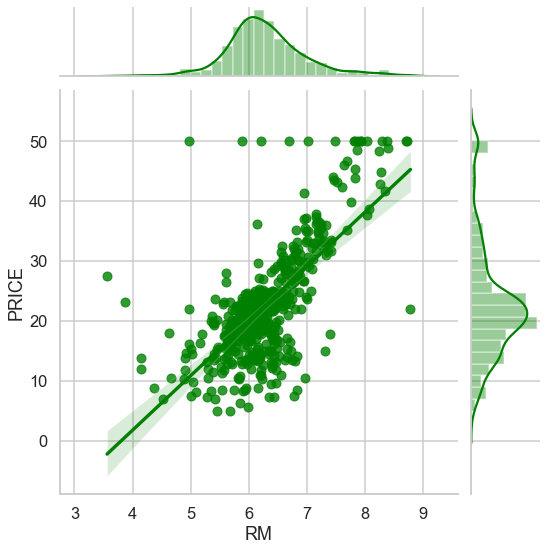

Wall time: 930 ms


In [29]:
%%time
sns.set() # Reset the style to default.
sns.set_style("whitegrid")
sns.set_context("talk") # Make it larger.
sns.jointplot(kind = "reg", x = data["RM"], y = data["PRICE"], height = 8, color = "green")
plt.show()

In [30]:
%%time
#sns.pairplot(data = data, kind = "reg", plot_kws = {"line_kws" : {"color" : "cyan"}})
#plt.show()

Wall time: 0 ns


## Split Training & Test Dataset

In [31]:
prices = data["PRICE"]
features = data.drop("PRICE", axis = 1)
# Tuple unpacking
# Shuffle in a certain way: random_state.
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 10)
# Check
print(len(X_train) / len(features))
print(X_test.shape[0] / features.shape[0])

0.7984189723320159
0.2015810276679842


## Multivariable Regression

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
# R-squared values for training and test datasets
# R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
print("R-squared (Training data) =", reg.score(X_train, y_train))
print("R-squared (Testing data) =", reg.score(X_test, y_test))
print("Intercept =", reg.intercept_)
# List of coefficients
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ["coef"])
# By interpreting the data, 1 more room potentially costs $3108 more.

R-squared (Training data) = 0.750121534530608
R-squared (Testing data) = 0.6709339839115628
Intercept = 36.53305138282439


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformations

In [33]:
# Skew: shows how different is the data compare with normal distribution.
data["PRICE"].skew()

1.1080984082549072

In [34]:
# Transform the price data to log scale
y_log = np.log(data["PRICE"])
y_log.skew()

-0.33032129530987864

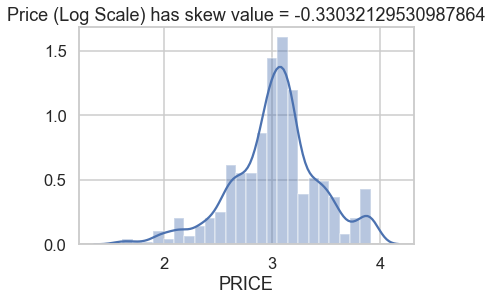

In [35]:
# Plot the distribution for price(log).
sns.distplot(y_log)
plt.title(f"Price (Log Scale) has skew value = {y_log.skew()}")
plt.show()

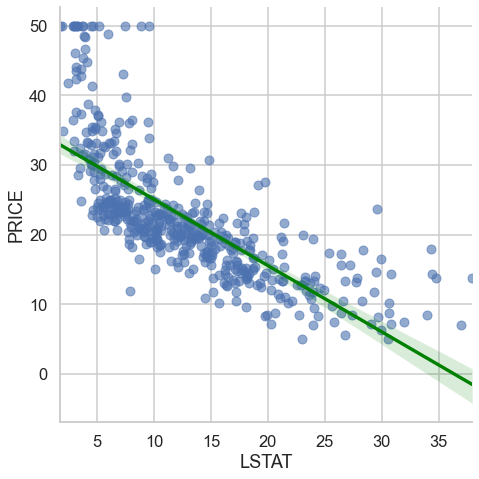

In [36]:
# Plot Price vs LSTAT
sns.lmplot(x = "LSTAT", y = "PRICE", data = data, height = 7,
          scatter_kws = {"alpha" : 0.6}, line_kws = {"color" : "green"})
plt.show()

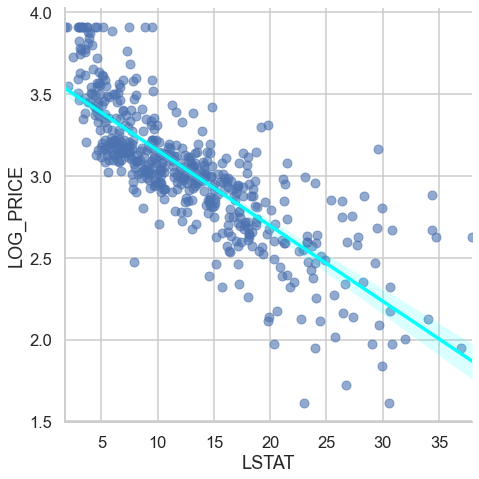

In [37]:
# Plot Price(log) vs LSTAT
transformed_data = features
transformed_data["LOG_PRICE"] = y_log
sns.lmplot(x = "LSTAT", y = "LOG_PRICE", data = transformed_data, height = 7,
          scatter_kws = {"alpha" : 0.6}, line_kws = {"color" : "cyan"})
plt.show()

## Regression using prices (log)

In [38]:
%%time
log_prices = np.log(data["PRICE"]) # Use prices(log)
features = data.drop("PRICE", axis = 1)
# Tuple unpacking
# Shuffle in a certain way: random_state.
X_train, X_test, y_train, y_test = train_test_split(features, log_prices, test_size = 0.2, random_state = 10)

reg = LinearRegression()
reg.fit(X_train, y_train)
# R-squared values for training and test datasets
# R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
print("R-squared (Training data) =", reg.score(X_train, y_train))
print("R-squared (Testing data) =", reg.score(X_test, y_test))
print("Intercept =", reg.intercept_)
# List of coefficients
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ["coef"])
# By interpreting the data, 1 more room potentially costs $3108 more.

R-squared (Training data) = 0.7930234826697583
R-squared (Testing data) = 0.7446922306260724
Intercept = 4.05994387177519
Wall time: 14.5 ms


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [39]:
# How much are people willing to pay to live close to the river? (CHAS)
# Reverse log
np.e ** 0.080331

1.0836456950439142

## P Values & Evaluating Coefficients

In [40]:
# Generally p threshold is 0.05
X_include_const = sm.add_constant(X_train) # Add intercept
model = sm.OLS(y_train, X_include_const)
results = model.fit()
#results.params
#results.pvalues
pd.DataFrame({"coef" : results.params, "p-value" : round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity
$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT$$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)}$$

In [41]:
# Generally p threshold is 10
# Calculate and print all VIF values.
# Method 1
#vif_list = [] # Empty list to store vif values.
#for i in range(len(X_include_const.columns)):
#    vif_list.append(variance_inflation_factor(exog = X_include_const.values, exog_idx = i))
#print(vif_list)

# Method 2
vif_list = [variance_inflation_factor(exog = X_include_const.values, exog_idx = i)
            for i in range(len(X_include_const.columns))]
pd.DataFrame({"coef" : X_include_const.columns, "vif" : np.around(vif_list, 2)})

,coef,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification & the BIC

In [54]:
# Original Model
X_include_const = sm.add_constant(X_train) # Add intercept
model = sm.OLS(y_train, X_include_const)
results = model.fit()
original_coef = pd.DataFrame({"coef" : results.params, "p-value" : round(results.pvalues, 3)})
print(results.bic)
print(results.rsquared)
#print(results.summary())

-139.74997769478875
0.7930234826697582


In [66]:
# Reduced model
# 1 Excluding INDUS (because of its large p value)
# This results in a smaller BIC value.
X_include_const = sm.add_constant(X_train) # Add intercept
X_include_const = X_include_const.drop(["INDUS"], axis = 1)
model = sm.OLS(y_train, X_include_const)
results = model.fit()
reduced_coef1 = pd.DataFrame({"coef" : results.params, "p-value" : round(results.pvalues, 3)})
print(results.bic)
print(results.rsquared)
#print(results.summary())

-145.14508855591163
0.7927126289415163


In [68]:
# Reduced model
# 2 Excluding INDUS, AGE (because of their large p values)
# This results in a smaller BIC value.
X_include_const = sm.add_constant(X_train) # Add intercept
X_include_const = X_include_const.drop(["INDUS", "AGE"], axis = 1)
model = sm.OLS(y_train, X_include_const)
results = model.fit()
reduced_coef2 = pd.DataFrame({"coef" : results.params, "p-value" : round(results.pvalues, 3)})
print(results.bic)
print(results.rsquared)
print(results.summary())

-149.49934294224656
0.7918657661852815
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):          3.68e-126
Time:                        01:09:08   Log-Likelihood:                 110.76
No. Observations:                 404   AIC:                            -197.5
Df Residuals:                     392   BIC:                            -149.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [69]:
frames = [original_coef, reduced_coef1, reduced_coef2]
pd.concat(frames, axis = 1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000
